# HSV Golf Ball Countour Detection

As a developer<br/>
So that I can identify the features of a golf ball<br/>
I want to accurately find the region of an image where a golf ball is present

Given an image where the background has been removed<br/>
When an HSV filter is used to mask the region<br/>
Then the system should draw the bounding boxes of the masked region

[Info] Given an image where the background has been removed


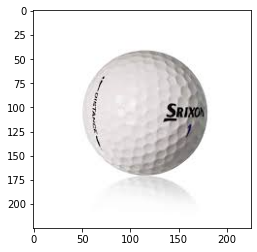

In [113]:
from matplotlib import pyplot as plt
import numpy as np
import imutils
import cv2

image_path = '../test-images/srixon/srixon-1-perspective.jpg'
image = cv2.imread(image_path,3)
print('[Info] Given an image where the background has been removed')
plt.imshow(image)

[Info] When an HSV filter is used to mask the region


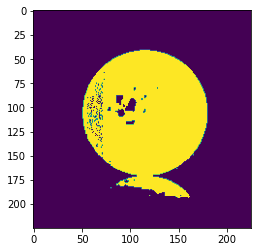

In [114]:
print('[Info] When an HSV filter is used to mask the region')
frame_to_thresh = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
min_hsv = (0, 0, 240)
max_hsv = (255, 50, 255)
mask = cv2.inRange(frame_to_thresh, min_hsv , max_hsv)
inverted = cv2.bitwise_not(mask)
plt.imshow(inverted)

In [115]:
print('[INFO] Then the system should draw the bounding boxes of the masked region')
contours = cv2.findContours(inverted.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)

ball_contours = imutils.grab_contours(contours)

# loop over the contours
for c in ball_contours:
    # compute the center of the contour
    M = cv2.moments(c)
    if(M["m00"]==0):
        continue
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * perimeter, True)

    if(len(approx) <6 ): 
            continue #3 is a triangle, 4 is a rectangle, 5 is pentagon - not circles so can be ignored

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    area = cv2.contourArea(c)
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(image, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)

    print('[DEBUG] Golf balls are round so the bounding rect should have an aspect ratio close to 1')

    x,y,w,h = cv2.boundingRect(c)
    ar = min(w,h)/max(w,h)
    
    print(f'[ERROR] found aspect ratio {ar}')

[INFO] Then the system should draw the bounding boxes of the masked region
[DEBUG] Golf balls are round so the bounding rect should have an aspect ratio close to 1
[ERROR] found aspect ratio 0.8431372549019608


Having followed that process this is what I'm looking at:

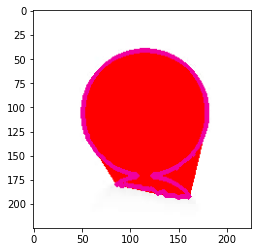

In [116]:
plt.imshow(image)

The shadow below the image is included in the contour - I have tried eroding and dilating to see if I can disconnect it but not had much success

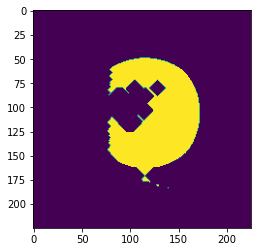

In [117]:

element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) 
eroded = cv2.erode(inverted, element, iterations=8)
dilated = cv2.dilate(eroded, element, iterations=8)
plt.imshow(eroded)

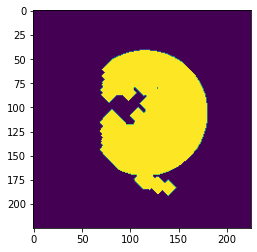

In [118]:
plt.imshow(dilated)